# TEXAS14

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import cumulative_trapezoid
from pathlib import Path

In [5]:
EXPID = 'TEXAS14'
EXPTYPE = 'mfci'
DATE = '2015-10-21'

## Load Data

Fix for slightly 'broken' logger timeline

In [6]:
SRATE = 1.0e5
DURATION = 2.0
index = np.arange(DURATION * SRATE) / SRATE

In [7]:
folder = Path('../../data/sensors/')
file = next(folder.glob(f"*{EXPID}.txt"))
file

PosixPath('../../data/sensors/2015-10-21_TEXAS14.txt')

In [9]:
data = pd.read_csv(file, skiprows=2, sep='\t',
    names=['trig', 'force', 'mic', 'el', 'seis', 'shockw', 'water'],
    index_col=0
)
data.index = index
data.index.name = 't'
data.force *= 1e3
data.shockw *= 1e5
data.head()

trig    force       mic        el      seis   shockw     water
t                                                                          
0.00000  0.246901 -6.25054 -0.001741 -0.317376 -0.007217 -625.054  5.654603
0.00001  0.455285 -5.92846 -0.000775 -0.317054 -0.005928 -657.261  5.653315
0.00002  0.880748 -5.60638 -0.000775 -0.317376 -0.004318 -721.676  5.654281
0.00003  1.266595 -5.28431 -0.001097 -0.318020 -0.004640 -625.054  5.653959
0.00004  1.620880 -6.25054 -0.001097 -0.316088 -0.004640 -721.676  5.653637

In [10]:
units = ['s', 'V', 'N', 'V', 'V', 'V', 'Pa', 'V']

## Show Raw Data

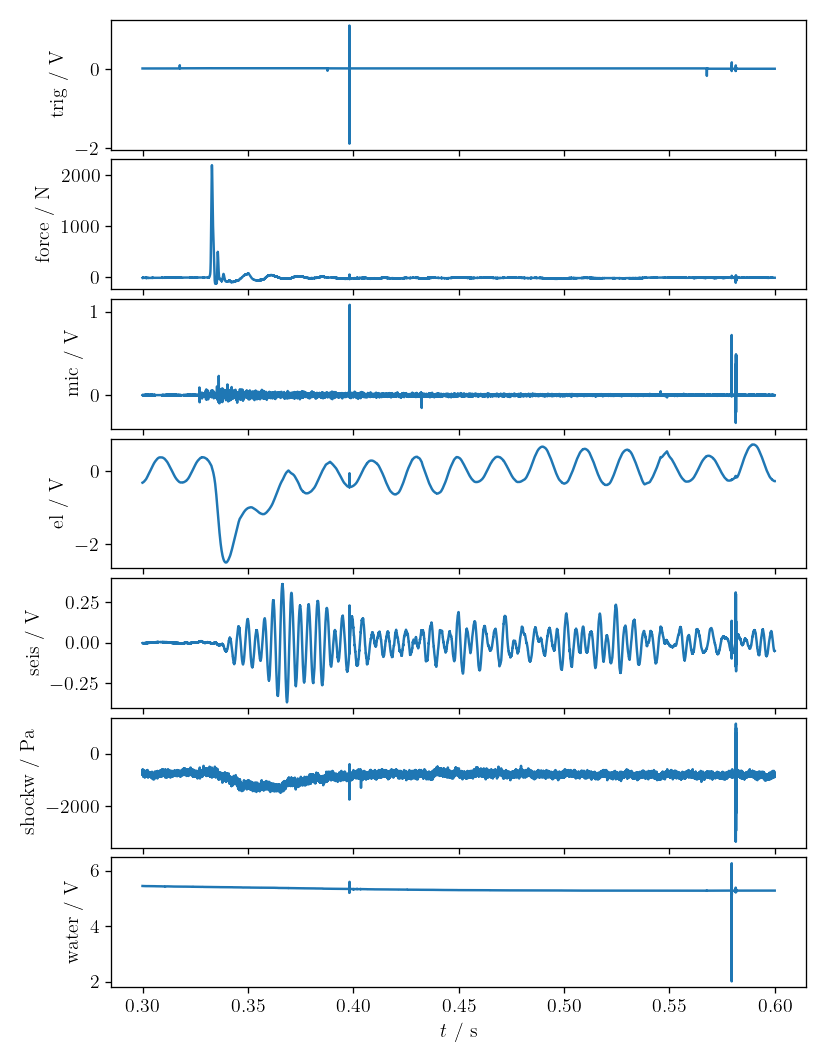

In [12]:
fig, axs = plt.subplots(nrows=data.shape[1], sharex=True)

for ax, col in zip(axs, data.columns):
    ax.plot(data.loc[0.3:.55, col])
axs[-1].set(xlabel=r'$t\ /\ \mathrm{s}$')
for ax, nm, unt in zip(axs, data.columns, units[1:]):
    ax.set_ylabel(f'{nm} / {unt}')
fig.set_size_inches(7, 9)
fig.tight_layout(pad=1, h_pad=0.)

- Mic caught peak at .39s

In [13]:
ttrig = 0.3168097
tspike = 0.57951492

## Summary Entries

In [14]:
fmax, fmin = data.loc[ttrig:0.39, 'force'].max(), data.loc[ttrig:.39, 'force'].min()
fmax, fmin

(2192.88922, -120.58757)

### Summary

In [15]:
summ = pd.read_csv('../../data/summary.csv', index_col=0)
summ.loc[EXPID, 'exptype'] = EXPTYPE
summ.loc[EXPID, ['ttrig', 'tspike']] = [ttrig, tspike]
summ.loc[EXPID, ['Fmin', 'Fmax']] = fmin, fmax
summ.sort_index(inplace=True)
summ

exptype     ttrig    tspike        Fmax       Fmin       pmax
expid                                                                     
H254-MFCI-03    ifci  1.987743  2.497569  1157.73400 -210.44680  4479971.0
H254-dry-01      dry  1.987832  2.497630   762.86770 -300.95020  3695707.0
TEXAS01         mfci  0.317606  0.579475   321.62310  -75.17484        NaN
TEXAS02         mfci  0.317635  0.579426   971.89530 -110.92530        NaN
TEXAS03         mfci  0.317675  0.579365  1358.38700 -127.99530        NaN
TEXAS04         mfci  0.317716  0.579325   913.92160 -120.26550        NaN
TEXAS05         mfci  0.317735  0.579345  1554.53200 -116.72270        NaN
TEXAS06         mfci  0.367757  0.629375   697.16410 -121.87590        NaN
TEXAS07         mfci  0.367776  0.629365  1708.16300 -121.55380        NaN
TEXAS08         mfci  0.267725  0.398135  3251.23800 -116.72270        NaN
TEXAS09         mfci  0.267745  0.378096   303.26470  -70.98785        NaN
TEXAS10         mfci  0.267745  0.398084  1140.34100  -91.27864        NaN
TEXAS11         mfci  0.317755  0.579375  2431.22700 -113.82400        NaN
TEXAS12         mfci  0.317755  0.579365  1817.02500 -121.87590        NaN
TEXAS13         mfci  0.317734  0.582784  2988.42200 -111.89150        NaN
TEXAS14         mfci  0.316810  0.579515  2192.88922 -120.58757        NaN
billstein01     mfci  0.317654  0.579460   286.26030  -39.35883        NaN
billstein02     mfci  0.317585  0.579495   679.03260  -86.86507        NaN
billstein03     mfci  0.317615  0.579465   177.55950  -37.42638        NaN
billstein04     mfci  0.317574  0.579375  1996.81500 -122.13240        NaN

### asdf

In [17]:
import asdf

In [18]:
tree = {
    'id': EXPID,
    'date': DATE,
    'srate': SRATE,
    'summ': dict(summ.loc[EXPID]),
    'fields': ['t'] + list(data.columns),
    'units': units,
    'time': {'ttrig': ttrig, 'tspike': tspike, 't': data.index.values},
}
for col in data.columns:
    tree[col] = data[col].values
af = asdf.AsdfFile(tree)